In [8]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Прогнозирование сердечной недостаточности

### 1. Загрузка данных.

In [161]:
filename = 'heart.csv'
df = pd.read_csv(filename)

### 2. Описание задачи и датасета.

Рассмотрим полученный датасет:

In [121]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Датасет содержит 918 записей о пациентах, каждая из которых содержит следующие 12 признаков:
1. Age - возраст пациента в годах
2. Sex - пол пациента (M: мужчина, F: женщина)
3. ChestPainType - тип боли в груди (TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомная)
4. RestingBP - артериальное давление в покое (мм. рт. ст.)
5. Cholesterol - сывороточный холестерин (мг/дл)
6. FastingBS - уровень сахара в крови натощак (1: если уровень сахара > 120 мг/дл, 0: в противном случае)
7. RestingECG - результаты электрокардиограммы в покое (Normal - нормальный, ST - имеются аномальные волны ST-T (инверсия зубца Т и/или элевация или депрессия сегмента ST > 0,05 мВ), LVH - показывает вероятную или определенную гипертрофию левого желудочка по критериям Эстеса)
8. MaxHR - достижение максимальной частоты сердечных сокращений (числовое значение от 60 до 202)
9. ExerciseAngina - стенокардия, вызванная физической нагрузкой (Y - да, N - нет)
10. Oldpeak - oldpeak = ST (числовое значение, измеренное в депрессии)
11. ST_Slope: наклон сегмента ST пикового упражнения (Up: восходящий, Flat: плоский, Down: нисходящий)
12. HeartDisease: выходной класс (1: болезнь сердца, 0: нормальный)

Необходимо обучить на данном датасете модель, которая могла бы при наличии первых 11 признаков, определять есть ли у человека болезнь сердечной недостаточности.

### 3. Определение дисбаланса классов.

In [122]:
have_HeartDisease = df[df['HeartDisease'] == 1].shape[0]
dont_have_HeartDisease = df[df['HeartDisease'] == 0].shape[0]

print('Количество людей, имеющих болезни сердечной недостаточности, в датасете: ', have_HeartDisease)
print('Количество людей, не имеющих болезни сердечной недостаточности, в датасете: ', dont_have_HeartDisease)

Количество людей, имеющих болезни сердечной недостаточности, в датасете:  508
Количество людей, не имеющих болезни сердечной недостаточности, в датасете:  410


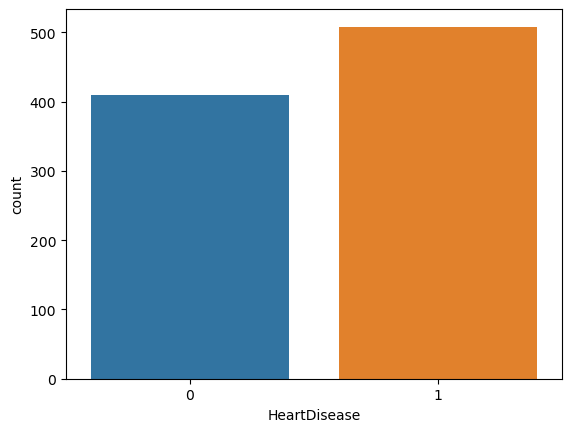

In [123]:
sns.countplot(x=df['HeartDisease'])
pass

Можно сделать вывод о том, что работаем с довольно сбалансированным целевым классом в датасете.

### 4. Обработка категориальных признаков.

В датасете есть ряд признаков, имеющих категориальный тип, для построения графиков, корреляционных матриц и для облегчения обучения переведем данные признаки в числовой вид.

In [162]:
from sklearn import preprocessing 

categorial_columns = ['ChestPainType', 'RestingECG', 'ST_Slope', 'Sex', 'FastingBS', 'ExerciseAngina', 'HeartDisease']
label_encoder = preprocessing.LabelEncoder()
for column in categorial_columns:
    df[column] = label_encoder.fit_transform(df[column])
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


### 5. Обработка пропущенных значений

Проверим датасет на пропущенные значения:

In [126]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Пропущенных значений нет.

### 6. Визуализация данных.

Построим диаграммы рассеивания для всех количественных признаков:

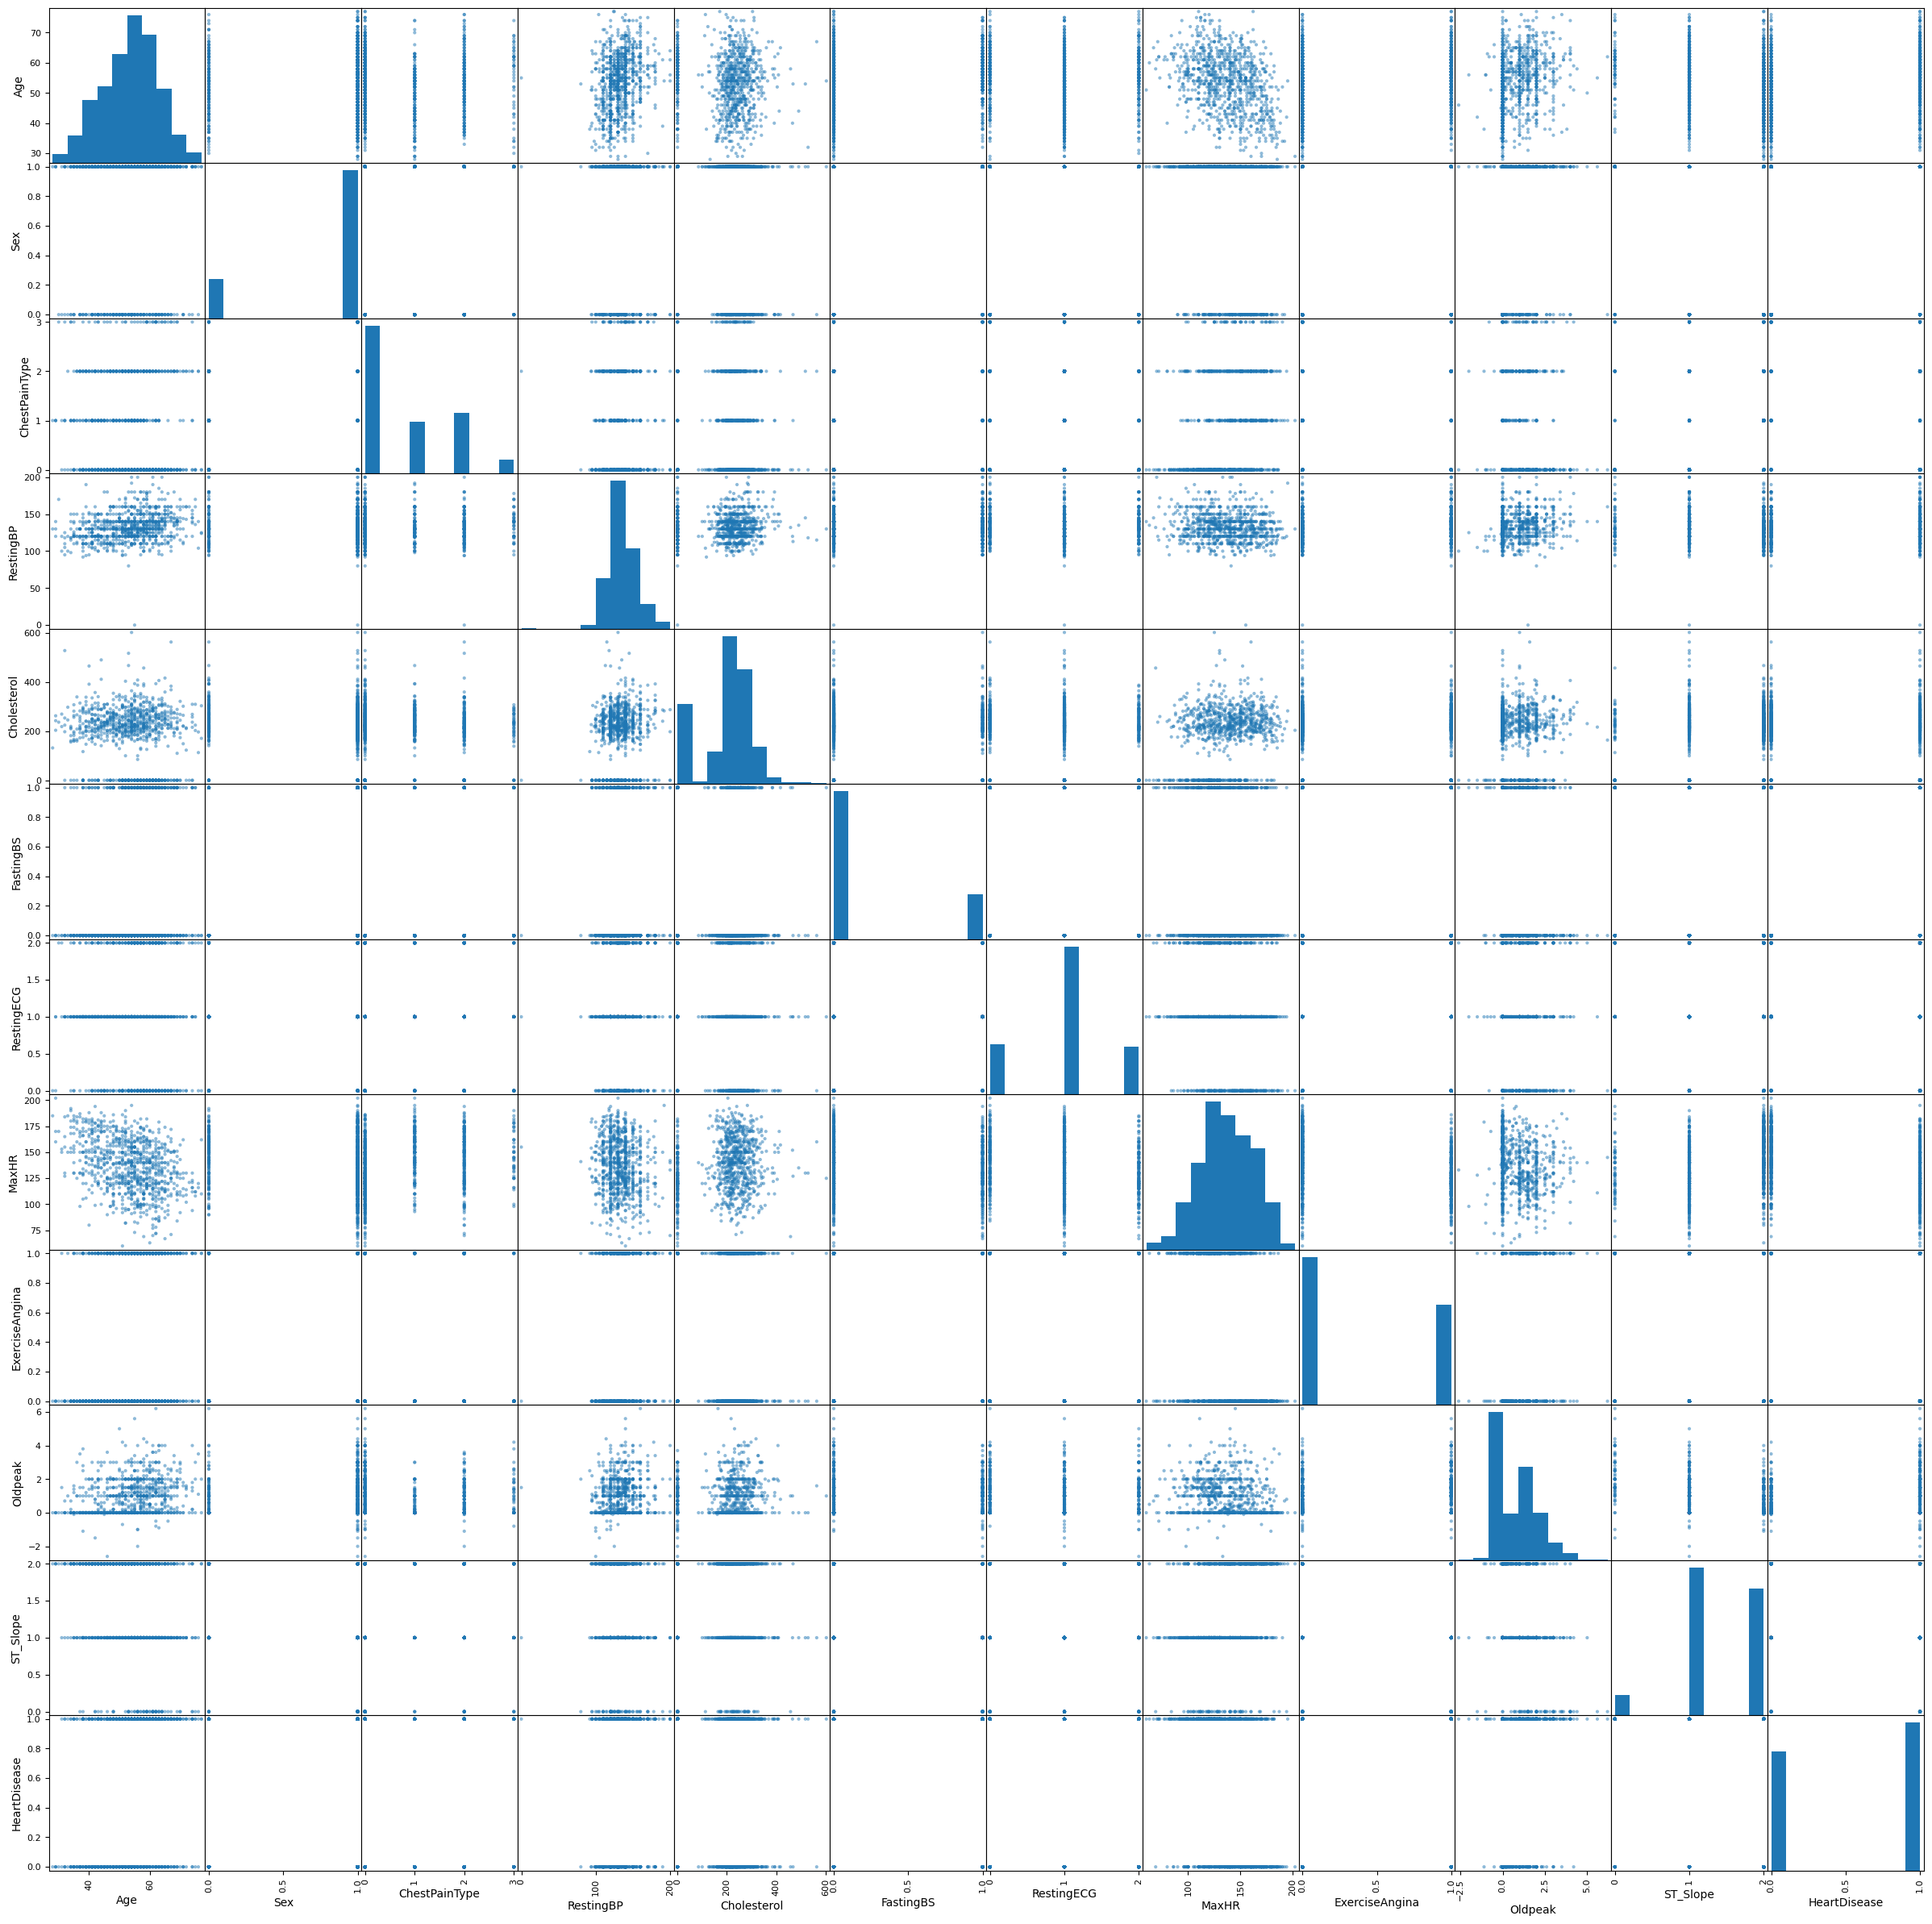

In [155]:
pd.plotting.scatter_matrix(df, figsize = (30, 30))
pass

Заметим, что у признака Cholesterol довольно много нулевых значений. Теоретически такого значения уровня холестерина в крови у человека не может быть. Поэтому удалим все такие значения.

In [156]:
outlers = df[df['Cholesterol'] == 0]
persentage_of_outlers = outlers.shape[0] / df.shape[0] * 100
print('Процент выбросов:', persentage_of_outlers, '%')

Процент выбросов: 18.736383442265794 %


In [163]:
df = df[df['Cholesterol'] > 0]

Также меня очень беспокоит высокая распространненость нулевого значения признака Oldpeak, но с ним к сожалению сложно разобраться в силу недостаточных познаний в медицине, поэтому примем, что он может принимать такие значения и оставим данный признак в неизменном виде.

Еще по графику можно сделать вывод о том, что в датасете присутствует больше данных о мужчинах. Это может иметь критическое значение для определения болезни у женщин, поскольку женские и мужские организмы устроены разным образом, поэтому проведу балансировку по данному признаку:

In [184]:
X = df.drop(['Sex'], axis=1)
y = df['Sex']

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.concat([X, y], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex
0,63,0,150,223,0,1,115,0,0.0,1,1,1
1,35,0,130,168,0,1,186,0,0.0,2,0,0
2,43,2,122,213,0,1,165,0,0.2,1,0,0
3,46,1,115,168,0,1,142,0,0.0,1,0,0
4,56,1,121,338,0,1,167,0,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1123,47,1,130,304,0,1,166,0,0.0,2,0,0
1124,48,0,122,222,0,0,186,0,0.0,2,0,1
1125,50,0,144,200,0,0,126,1,0.9,1,1,1
1126,46,0,138,243,0,0,152,1,0.0,1,0,0


Построим корреляционную матрицу и для удобства визуализируем ее:

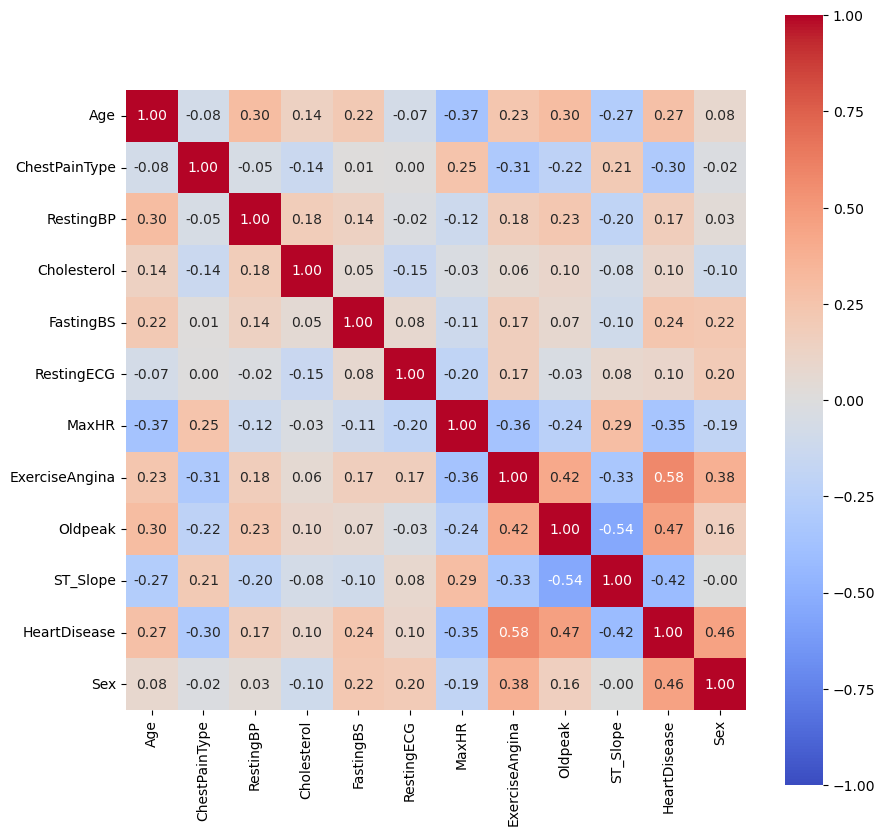

In [179]:
corr_mat = df.corr()

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax)
pass

По графику можно сделать следующие выводы:
1. Наиболее яркая корреляция между различными признаками наблюдается у ExerciseAngina (стенокардия, вызванная физической нагрузкой) и HeartDisease, наименее яркая между ST_Slope и Oldpeak.
2. Признаки, которые наиболее заметно коррелируют с искомым нами признаком, это Sex (пол), Oldpeak и ExerciseAngina (стенокардия, вызванная физической нагрузкой), а также в некоторой степени Age (возраст).
3. Каких-то критически зависимых признаков не имеется, поэтому никакие признаки не будут удалены из обучающей выборки по причине сильной корреляции.

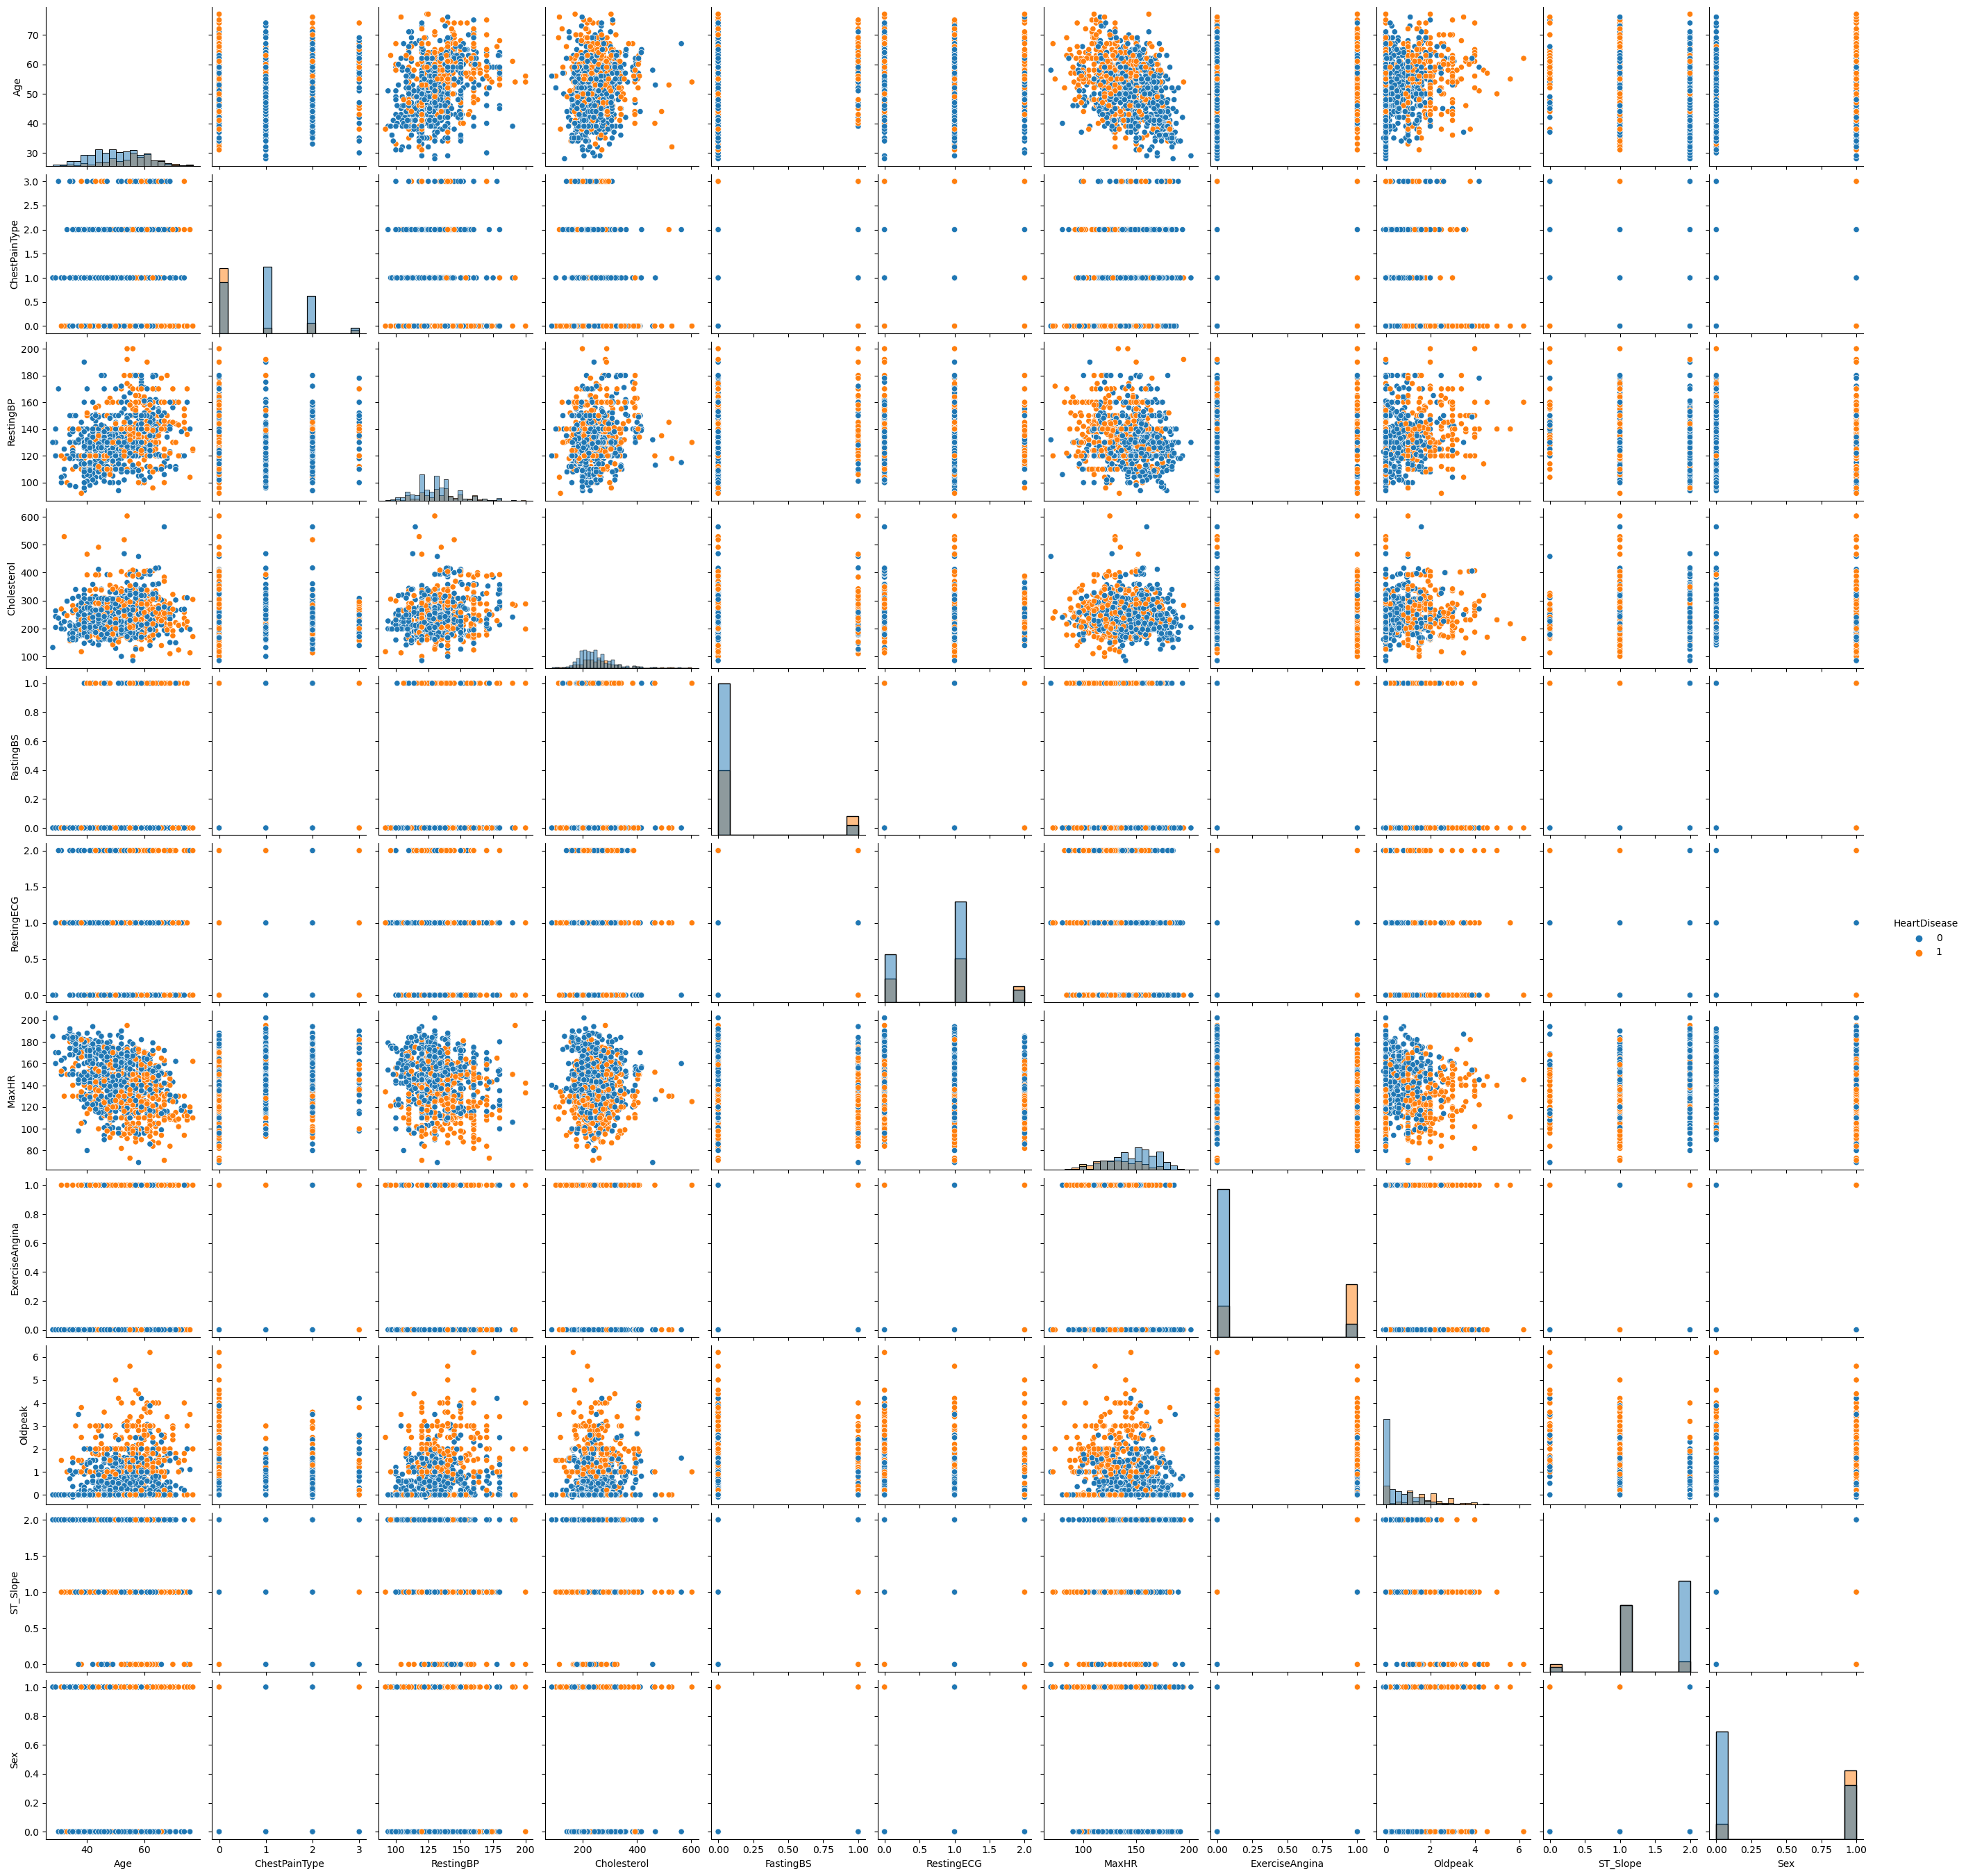

In [192]:
sns.pairplot(df, hue='HeartDisease', diag_kind='hist')
pass

По графику выше можно увидеть, что каких-то очень ярких и явных корреляций между признаками мы действительно не имеем.

### 7. Масштабирование

Нормализуем и стандартизируем данные:

In [187]:
X = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

X = preprocessing.normalize(X)
X = preprocessing.scale(X)

### 8. Разбиение датасета на обучающую и тестовую выборки.

Разобьем датасет на обучающую и тестовую выборки в соотношении 3:1.

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Перед обучением модели и получением метрик заметим, что для нашей задачи (предсказание медицинских результатов), наиболее важно улучшать матрику Recall.

### 9. Обучение модели.

Рассмотрим три метода классификации - метод ближайших k-соседей, Логистическую Регрессию, а также Случайный Лес.

In [198]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

#### 9.1 kNN

In [221]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Метод ближайших k-соседей:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC-AUC score:', roc_auc_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Метод ближайших k-соседей:
RMSE: 0.3420837274641176
Precision: 0.8505747126436781
Recall: 0.7872340425531915
F1: 0.8176795580110497
ROC-AUC score: 0.8590425531914893
Accuracy: 0.8829787234042553


C:\Users\Anastasia\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Довольно неплохие значения метрик, по умолчанию k = 5.

#### 9.2 Logistic Regrassion

In [223]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Логистическая регрессия:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC-AUC score:', roc_auc_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Логистическая регрессия:
RMSE: 0.3472281323374084
Precision: 0.8409090909090909
Recall: 0.7872340425531915
F1: 0.8131868131868133
ROC-AUC score: 0.8563829787234042
Accuracy: 0.8794326241134752


Метрика Recall не изменилась, все остальные метрики ухудшились. Пока что лидирует модель kNN.

#### 9.3 Random Forest Tree

In [294]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Случайный лес:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC-AUC score:', roc_auc_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Случайный лес:
RMSE: 0.3261640365267211
Precision: 0.8636363636363636
Recall: 0.8085106382978723
F1: 0.8351648351648351
ROC-AUC score: 0.8723404255319149
Accuracy: 0.8936170212765957


По всем метрикам наблюдаем улучшение значений в сравнении с kNN. Остановимся на данной модели.

### 10. Подор оптимальных гиперпараметров.

В качестве гиперпараметра выберем количество деревьев в моделе Случайного Леса и попробуем найти наиболее оптимальный резльтат:

In [312]:
n_estimators = np.linspace(10, 150, dtype=int)

errors_test = np.zeros([len(n_estimators)])
errors_train = np.zeros([len(n_estimators)])

for i, n_estimator in enumerate(n_estimators):

    model = RandomForestClassifier(n_estimators=n_estimator)
    model.fit(X_train, y_train)

    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    errors_train[i] = mean_squared_error(y_train, y_train_predict, squared=False)
    errors_test[i]  = mean_squared_error(y_test,  y_test_predict, squared=False)

Визуализируем графики среднеквадратических ошибок модели на обучающей и тестовой выборках от количества деревьев в моделе:

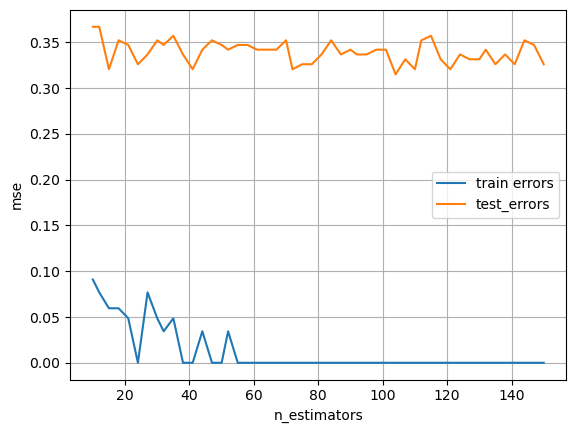

In [313]:
plt.figure()
plt.plot(n_estimators, errors_train)
plt.plot(n_estimators, errors_test)
plt.grid()
plt.xlabel('n_estimators')
plt.ylabel('mse')
plt.legend(['train errors', 'test_errors'])

In [317]:
optimal_hyperparametr = n_estimators[np.where(errors_test == min(errors_test))][0]
print(optimal_hyperparametr)

model = RandomForestClassifier(n_estimators=optimal_hyperparametr)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Случайный лес с оптимальным гиперпараметром:')
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))
print('ROC-AUC score:', roc_auc_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

104
Случайный лес с оптимальным гиперпараметром:
RMSE: 0.320681897575501
Precision: 0.8735632183908046
Recall: 0.8085106382978723
F1: 0.839779005524862
ROC-AUC score: 0.875
Accuracy: 0.8971631205673759


По большинству метрик модель улучшилась, но незначительно.

### Вывод

В целом я довольна полученным результатом. Конечно, в таких важных задачах необходимы консультации специалистов, которые помогли бы разобраться в природе и значении некоторых признаков. 

Что касается самого датасета, то стоит отметить, что текущая размерность довольно маленькая, что, как мне кажется, не позволяет делать хоть сколько-нибудь серьезные выводы о полученных результатах. Корреляция между признаками почти отсутствует, выходной класс сбалансирован.